In [40]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [41]:
# Read in the data set
input_data = "Resources/cosmetics_data.csv"
cosmetics_df = pd.read_csv(input_data, low_memory=False)
cosmetics_df.head(1)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [42]:
# Remove unnecessary columns
columns_to_drop = ["CDPHId", "CSFId", "CompanyId", "PrimaryCategoryId", "SubCategoryId", "CasId", "ChemicalId"]
cosmetics_cleaned_df = cosmetics_df.drop(columns=columns_to_drop)
cosmetics_cleaned_df.head(1)

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,CasNumber,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",13463-67-7,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [43]:
# Change dates to datetime objects
cosmetics_cleaned_df["InitialDateReported"] = pd.to_datetime(cosmetics_cleaned_df["InitialDateReported"])
cosmetics_cleaned_df["MostRecentDateReported"] = pd.to_datetime(cosmetics_cleaned_df["MostRecentDateReported"])
cosmetics_cleaned_df["DiscontinuedDate"] = pd.to_datetime(cosmetics_cleaned_df["DiscontinuedDate"])
cosmetics_cleaned_df["ChemicalCreatedAt"] = pd.to_datetime(cosmetics_cleaned_df["ChemicalCreatedAt"])
cosmetics_cleaned_df["ChemicalUpdatedAt"] = pd.to_datetime(cosmetics_cleaned_df["ChemicalUpdatedAt"])
cosmetics_cleaned_df["ChemicalDateRemoved"] = pd.to_datetime(cosmetics_cleaned_df["ChemicalDateRemoved"])
cosmetics_cleaned_df.head(1)

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,CasNumber,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",13463-67-7,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


In [44]:
# Check shape
cosmetics_cleaned_df.shape

(114635, 15)

In [45]:
# Check for duplicates
print(cosmetics_cleaned_df.duplicated().sum())

7701


In [46]:
# Drop duplicates and check shape again
cosmetics_cleaned_df = cosmetics_cleaned_df.drop_duplicates()
cosmetics_cleaned_df.shape

(106934, 15)

In [47]:
# Check unique values for each column
cosmetics_cleaned_df.nunique()

ProductName               33715
CSF                       34251
CompanyName                 606
BrandName                  2711
PrimaryCategory              13
SubCategory                  89
CasNumber                   119
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
ChemicalCount                10
dtype: int64

In [48]:
# Extract the year from the date columns
cosmetics_cleaned_df['YearReported'] = cosmetics_cleaned_df['InitialDateReported'].dt.year
cosmetics_cleaned_df['YearCreated'] = cosmetics_cleaned_df['ChemicalCreatedAt'].dt.year
cosmetics_cleaned_df['YearMostRecent'] = cosmetics_cleaned_df['MostRecentDateReported'].dt.year
cosmetics_cleaned_df.head(1)

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,CasNumber,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,YearReported,YearCreated,YearMostRecent
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",13463-67-7,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,2009,2009,2013


In [49]:
# Count the number of reports for each year
yearly_report_count = cosmetics_cleaned_df['YearReported'].value_counts().sort_index()

In [50]:
# Convert to a DataFrame for easier plotting
yearly_report_df = yearly_report_count.reset_index()
yearly_report_df.columns = ['Year', 'ReportCount']

In [51]:
# Exclude 2020 from the data
yearly_report_df = yearly_report_df[yearly_report_df['Year'] < 2020]
yearly_report_df

,Year,ReportCount
0,2009,28134
1,2010,13684
2,2011,4173
3,2012,3594
4,2013,6130
5,2014,8258
6,2015,7610
7,2016,4408
8,2017,6992
9,2018,9248


In [52]:
# Filter the dataset for reports of titanium dioxide
titanium_dioxide_df = cosmetics_cleaned_df[cosmetics_cleaned_df['ChemicalName'].str.contains("titanium dioxide", case=False, na=False)]
titanium_dioxide_df.head(1)

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,CasNumber,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,YearReported,YearCreated,YearMostRecent
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",13463-67-7,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,2009,2009,2013


In [53]:
# Count the number of titanium dioxide reports for each year
yearly_titanium_dioxide_count = titanium_dioxide_df['YearReported'].value_counts().sort_index()

In [54]:
# Convert to a DataFrame for easier plotting
yearly_titanium_dioxide_df = yearly_titanium_dioxide_count.reset_index()
yearly_titanium_dioxide_df.columns = ['Year', 'ReportCount']

In [55]:
# Exclude 2020 from the data
yearly_titanium_dioxide_df = yearly_titanium_dioxide_df[yearly_titanium_dioxide_df['Year'] < 2020]
yearly_titanium_dioxide_df

,Year,ReportCount
0,2009,23639
1,2010,11174
2,2011,3365
3,2012,2971
4,2013,4553
5,2014,7473
6,2015,6449
7,2016,3985
8,2017,5236
9,2018,7318


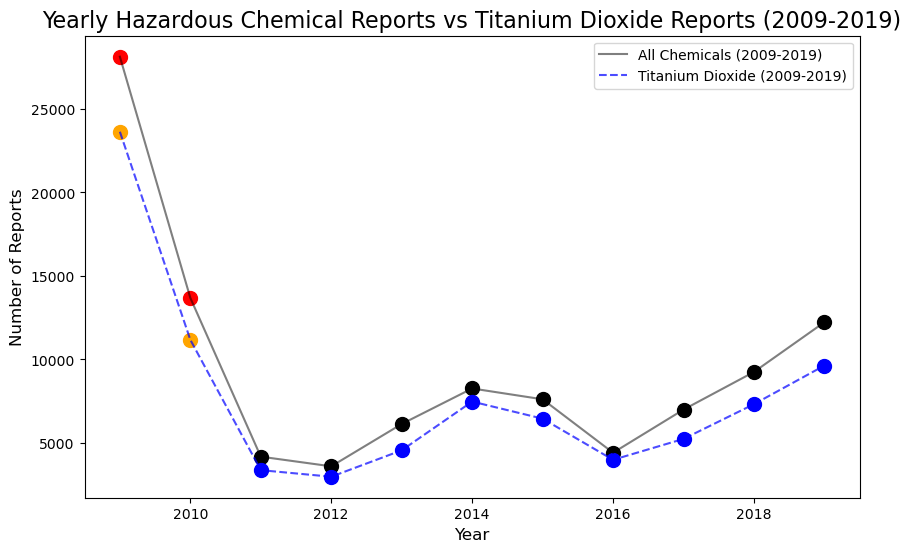

In [56]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot the line for all chemicals from 2009 to 2019 in light black (gray)
plt.plot(yearly_report_df['Year'], 
         yearly_report_df['ReportCount'], 
         color='black', alpha=0.5, label='All Chemicals (2009-2019)')

# Add large black circle markers for the years 2011-2019 for all chemicals
plt.scatter(yearly_report_df[yearly_report_df['Year'] > 2010]['Year'], 
            yearly_report_df[yearly_report_df['Year'] > 2010]['ReportCount'], 
            s=100, color='black')

# Add red circle markers for the years 2009-2010 for all chemicals
plt.scatter(yearly_report_df[yearly_report_df['Year'].isin([2009, 2010])]['Year'], 
            yearly_report_df[yearly_report_df['Year'].isin([2009, 2010])]['ReportCount'], 
            s=100, color='red')

# Plot the line for titanium dioxide from 2009 to 2019 in blue
plt.plot(yearly_titanium_dioxide_df['Year'], 
         yearly_titanium_dioxide_df['ReportCount'], 
         color='blue', alpha=0.7, label='Titanium Dioxide (2009-2019)', linestyle='--')

# Add blue circle markers for the years 2011-2019 for titanium dioxide
plt.scatter(yearly_titanium_dioxide_df[yearly_titanium_dioxide_df['Year'] > 2010]['Year'], 
            yearly_titanium_dioxide_df[yearly_titanium_dioxide_df['Year'] > 2010]['ReportCount'], 
            s=100, color='blue')

# Add orange circle markers for the years 2009-2010 for titanium dioxide
plt.scatter(yearly_titanium_dioxide_df[yearly_titanium_dioxide_df['Year'].isin([2009, 2010])]['Year'], 
            yearly_titanium_dioxide_df[yearly_titanium_dioxide_df['Year'].isin([2009, 2010])]['ReportCount'], 
            s=100, color='orange')

# Labels and Title
plt.title('Yearly Hazardous Chemical Reports vs Titanium Dioxide Reports (2009-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [57]:
# Check if L'Oréal USA has reported titanium dioxide
loreal_titanium_check = cosmetics_cleaned_df[
    (cosmetics_cleaned_df['CompanyName'] == "L'Oreal USA") &
    (cosmetics_cleaned_df['ChemicalName'] == "Titanium Dioxide")
]

# Display whether L'Oréal USA reported titanium dioxide
if loreal_titanium_check.empty:
    print("L'Oréal USA has not reported Titanium Dioxide.")
else:
    print("L'Oréal USA has reported Titanium Dioxide.")
    print(loreal_titanium_check)

L'Oréal USA has not reported Titanium Dioxide.


In [58]:
# Filter data for L'Oreal USA reports
loreal_df = cosmetics_cleaned_df[cosmetics_cleaned_df['CompanyName'] == "L'Oreal USA"]

# Count L'Oréal USA reports by year, excluding 2009 and 2020
loreal_yearly_report_count = loreal_df['YearReported'].value_counts().sort_index()
loreal_yearly_report_df = loreal_yearly_report_count.reset_index()
loreal_yearly_report_df.columns = ['Year', 'ReportCount']
loreal_yearly_report_df = loreal_yearly_report_df[(loreal_yearly_report_df['Year'] > 2009) & (loreal_yearly_report_df['Year'] < 2020)]

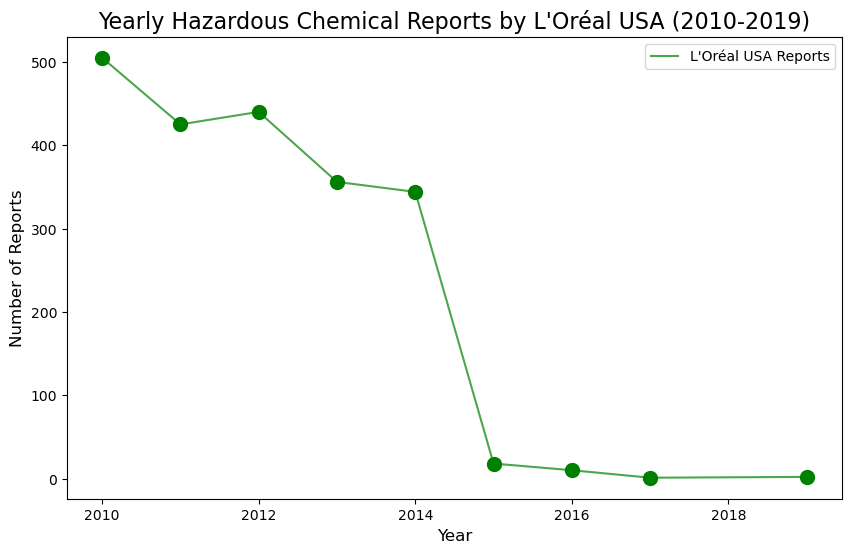

In [59]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot the line for L'Oréal USA reports
plt.plot(loreal_yearly_report_df['Year'], 
         loreal_yearly_report_df['ReportCount'], 
         color='green', alpha=0.7, label='L\'Oréal USA Reports')

# Add large circle markers for L'Oréal USA reports by year
plt.scatter(loreal_yearly_report_df['Year'], 
            loreal_yearly_report_df['ReportCount'], 
            s=100, color='green')

# Labels and Title
plt.title('Yearly Hazardous Chemical Reports by L\'Oréal USA (2010-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)
plt.legend()

# Display the plot
plt.show()

In [69]:
# Filter rows where a DiscontinuedDate is present (i.e., a chemical was discontinued)
discontinued_df = cosmetics_cleaned_df[cosmetics_cleaned_df['DiscontinuedDate'].notna()]

# Group by 'Company' and count the number of discontinued reports for each company
discontinuations_by_company = discontinued_df.groupby('CompanyName').size().reset_index(name='DiscontinuationCount')

# Sort the DataFrame by the number of discontinuations in descending order
discontinuations_by_company = discontinuations_by_company.sort_values(by='DiscontinuationCount', ascending=False)

# Put the top 10 companies into a DataFrame
top_10_discontinuations = discontinuations_by_company.head(10)
top_10_discontinuations

,CompanyName,DiscontinuationCount
165,The Procter & Gamble Company,2778
177,Victoria's Secret Beauty,924
51,"Elizabeth Arden, Inc.",720
93,MAESA LLC,643
24,"Buth-na-Bodhaige, Inc",549
15,Bath & Body Works,525
58,GUERLAIN,468
162,The Boots Company PLC,395
115,New Avon LLC,363
43,Cover FX Skin Care Inc.,351


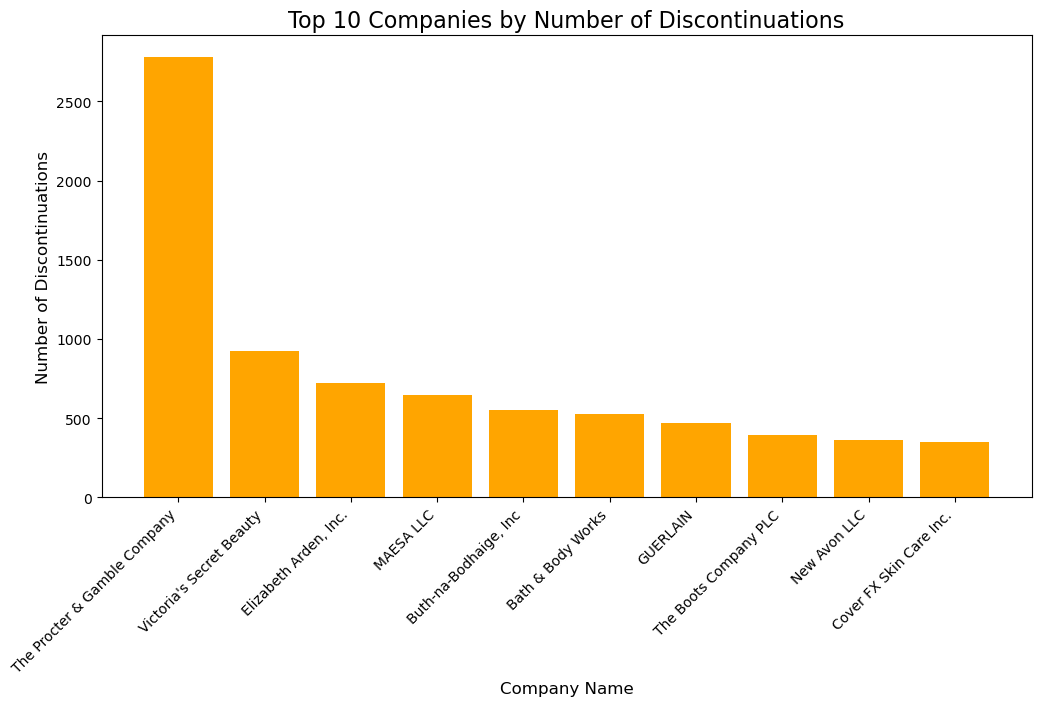

In [71]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Create a bar graph for the top 10 companies
plt.bar(top_10_discontinuations['CompanyName'], 
        top_10_discontinuations['DiscontinuationCount'], 
        color='orange')

# Labels and Title
plt.title('Top 10 Companies by Number of Discontinuations', fontsize=16)
plt.xlabel('Company Name', fontsize=12)
plt.ylabel('Number of Discontinuations', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Display the plot
plt.show()

In [67]:
# Filter data for Procter & Gamble reports
procter_gamble_df = cosmetics_cleaned_df[cosmetics_cleaned_df['CompanyName'] == "The Procter & Gamble Company"]

# Count Procter & Gamble reports by year, excluding 2009 and 2020
procter_gamble_yearly_report_count = procter_gamble_df['YearReported'].value_counts().sort_index()
procter_gamble_yearly_report_df = procter_gamble_yearly_report_count.reset_index()
procter_gamble_yearly_report_df.columns = ['Year', 'ReportCount']
procter_gamble_yearly_report_df = procter_gamble_yearly_report_df[(procter_gamble_yearly_report_df['Year'] > 2009) & (procter_gamble_yearly_report_df['Year'] < 2020)]

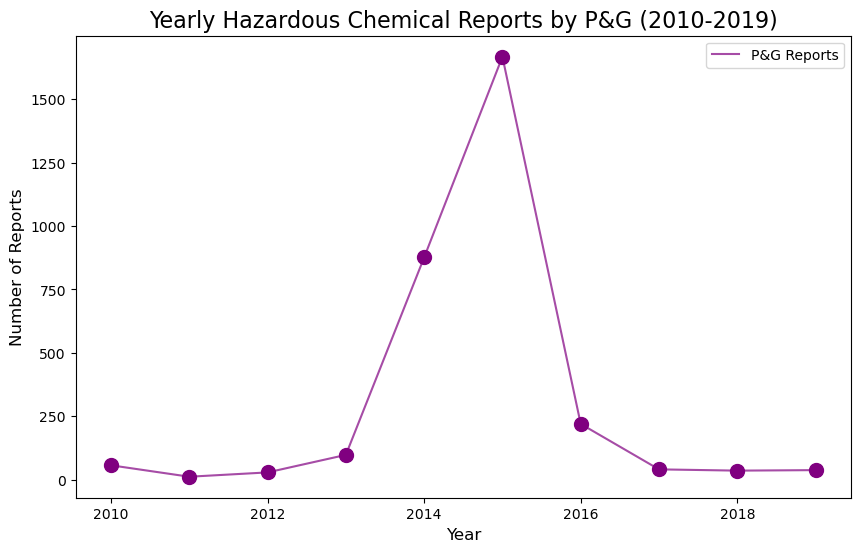

In [68]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot the line for L'Oréal USA reports
plt.plot(procter_gamble_yearly_report_df['Year'], 
         procter_gamble_yearly_report_df['ReportCount'], 
         color='purple', alpha=0.7, label='P&G Reports')

# Add large circle markers for L'Oréal USA reports by year
plt.scatter(procter_gamble_yearly_report_df['Year'], 
            procter_gamble_yearly_report_df['ReportCount'], 
            s=100, color='purple')

# Labels and Title
plt.title('Yearly Hazardous Chemical Reports by P&G (2010-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)
plt.legend()

# Display the plot
plt.show()

In [74]:
# Extract the year from the DiscontinuedDate
procter_gamble_df['DiscontinuationYear'] = procter_gamble_df['DiscontinuedDate'].dt.year

# Count the number of discontinuations for each year
discontinuations_by_year = procter_gamble_df['DiscontinuationYear'].value_counts().sort_index()

# Convert to a DataFrame for easier viewing
discontinuations_table = discontinuations_by_year.reset_index()
discontinuations_table.columns = ['Year', 'Number of Discontinuations']

discontinuations_table

,Year,Number of Discontinuations
0,2008.0,38
1,2009.0,122
2,2010.0,165
3,2011.0,112
4,2012.0,25
5,2013.0,115
6,2014.0,209
7,2015.0,97
8,2016.0,1471
9,2017.0,424


In [75]:
# Filter the DataFrame for discontinued chemicals
discontinued_chemicals_df = cosmetics_cleaned_df[cosmetics_cleaned_df['DiscontinuedDate'].notnull()]

# Count the number of discontinuations for each chemical
discontinuation_counts = discontinued_chemicals_df['ChemicalName'].value_counts()

# Get the most discontinued chemical
most_discontinued_chemical = discontinuation_counts.idxmax()
most_discontinuation_count = discontinuation_counts.max()

# Display the result
print(f"The most discontinued chemical is '{most_discontinued_chemical}' with {most_discontinuation_count} discontinuations.")

The most discontinued chemical is 'Titanium dioxide' with 9710 discontinuations.


In [77]:
# Convert to a DataFrame for better presentation
discontinuation_counts_df = discontinuation_counts.reset_index()
discontinuation_counts_df.columns = ['ChemicalName', 'DiscontinuationCount']

discontinuation_counts_df.head(20)

,ChemicalName,DiscontinuationCount
0,Titanium dioxide,9710
1,"Retinol/retinyl esters, when in daily dosages ...",633
2,Mica,394
3,Cocamide diethanolamine,355
4,Butylated hydroxyanisole,178
5,"Mineral oils, untreated and mildly treated",160
6,"Silica, crystalline (airborne particles of res...",94
7,Carbon black,82
8,Cosmetic talc,68
9,Retinyl palmitate,44


In [80]:
# Count the number of reports for each chemical
report_counts = cosmetics_cleaned_df['ChemicalName'].value_counts()

# Convert to a DataFrame for better presentation
report_counts_df = report_counts.reset_index()
report_counts_df.columns = ['ChemicalName', 'ReportCount']

report_counts_df.head(20)

,ChemicalName,ReportCount
0,Titanium dioxide,87445
1,"Silica, crystalline (airborne particles of res...",2461
2,"Retinol/retinyl esters, when in daily dosages ...",2033
3,Mica,1835
4,Carbon black,1704
5,Talc,1531
6,Cocamide diethanolamine,1361
7,Butylated hydroxyanisole,1301
8,Retinyl palmitate,1133
9,Vitamin A palmitate,953


In [84]:
# Merge the two DataFrames on ChemicalName
merged_df = pd.merge(report_counts_df, discontinuation_counts_df, on='ChemicalName', how='left')

# Fill NaN values in TotalDiscontinuations with 0
merged_df['DiscontinuationCount'] = merged_df['DiscontinuationCount'].fillna(0)

# Calculate the percentage of discontinuations
merged_df['DiscontinuationPercentage'] = (merged_df['DiscontinuationCount'] / merged_df['ReportCount']) * 100

merged_df

,ChemicalName,ReportCount,DiscontinuationCount,DiscontinuationPercentage
0,Titanium dioxide,87445,9710.0,11.104123
1,"Silica, crystalline (airborne particles of res...",2461,94.0,3.819586
2,"Retinol/retinyl esters, when in daily dosages ...",2033,633.0,31.136252
3,Mica,1835,394.0,21.471390
4,Carbon black,1704,82.0,4.812207
...,...,...,...,...
118,Acetylsalicylic acid,1,0.0,0.000000
119,2-Propyleneacrolein,1,0.0,0.000000
120,Spironolactone,1,1.0,100.000000
121,Extract of coffee bean,1,0.0,0.000000


In [91]:
# Filter to include only chemicals reported at least 100 times
filtered_df = merged_df[merged_df['ReportCount'] >= 100]

# Calculate the percentage of discontinuations
filtered_df['DiscontinuationPercentage'] = (filtered_df['DiscontinuationCount'] / filtered_df['ReportCount']) * 100

# Filter to include only percentages above 10%
filtered_above_10_percent = filtered_df[filtered_df['DiscontinuationPercentage'] > 10]

# Sort the DataFrame by DiscontinuationPercentage from highest to lowest
percent_sorted_df = filtered_above_10_percent.sort_values(by='DiscontinuationPercentage', ascending=False)

percent_sorted_df

,ChemicalName,ReportCount,DiscontinuationCount,DiscontinuationPercentage
17,Cosmetic talc,186,68.0,36.559140
10,"Mineral oils, untreated and mildly treated",512,160.0,31.250000
2,"Retinol/retinyl esters, when in daily dosages ...",2033,633.0,31.136252
6,Cocamide diethanolamine,1361,355.0,26.083762
3,Mica,1835,394.0,21.471390
20,Methyleugenol,150,32.0,21.333333
19,Estragole,154,26.0,16.883117
16,Benzophenone,231,37.0,16.017316
22,Formaldehyde (gas),139,22.0,15.827338
7,Butylated hydroxyanisole,1301,178.0,13.681783


In [94]:
# Sort the DataFrame by ReportCount from highest to lowest
report_sorted_df = merged_df.sort_values(by='ReportCount', ascending=False)
report_sorted_df.head(20)

,ChemicalName,ReportCount,DiscontinuationCount,DiscontinuationPercentage
0,Titanium dioxide,87445,9710.0,11.104123
1,"Silica, crystalline (airborne particles of res...",2461,94.0,3.819586
2,"Retinol/retinyl esters, when in daily dosages ...",2033,633.0,31.136252
3,Mica,1835,394.0,21.471390
4,Carbon black,1704,82.0,4.812207
5,Talc,1531,7.0,0.457218
6,Cocamide diethanolamine,1361,355.0,26.083762
7,Butylated hydroxyanisole,1301,178.0,13.681783
8,Retinyl palmitate,1133,44.0,3.883495
9,Vitamin A palmitate,953,33.0,3.462749


In [96]:
# Sort the DataFrame by DiscontinuationCount from highest to lowest
discontinuation_sorted_df = merged_df.sort_values(by='DiscontinuationCount', ascending=False)
discontinuation_sorted_df.head(20)

,ChemicalName,ReportCount,DiscontinuationCount,DiscontinuationPercentage
0,Titanium dioxide,87445,9710.0,11.104123
2,"Retinol/retinyl esters, when in daily dosages ...",2033,633.0,31.136252
3,Mica,1835,394.0,21.471390
6,Cocamide diethanolamine,1361,355.0,26.083762
7,Butylated hydroxyanisole,1301,178.0,13.681783
10,"Mineral oils, untreated and mildly treated",512,160.0,31.250000
1,"Silica, crystalline (airborne particles of res...",2461,94.0,3.819586
4,Carbon black,1704,82.0,4.812207
17,Cosmetic talc,186,68.0,36.559140
8,Retinyl palmitate,1133,44.0,3.883495
